# Asymmetric

In [108]:
import torch
import matplotlib.pyplot as plt

m = 197
n = 768
k = 197

W_fp = torch.randn(m, n)
X_fp = torch.randn(n, k) + 5
print(f"W_fp min: {W_fp.min()}, max: {W_fp.max()}")
print(f"A_fp min: {X_fp.min()}, max: {X_fp.max()}")
y_fp = W_fp @ X_fp
bits = 4

W_fp min: -3.900031566619873, max: 4.793203830718994
A_fp min: 0.7068524360656738, max: 9.57330322265625


W min: -7.0, max: 7.0
A min: -7.0, max: 7.0
zp_w min: 0.0, max: 0.0
zp_a min: -8.0, max: -8.0
torch.Size([197, 197])
torch.Size([197, 197])
torch.Size([197, 197])
torch.Size([197, 197])
tensor(0.)
org min:  tensor(-481.6528) max:  tensor(473.4311)
longversion min:  tensor(-481.6528) max:  tensor(473.4311)
tensor(4468.8955)
tensor(4468.8955)
tensor(4468.8955)
tensor(0.0064)


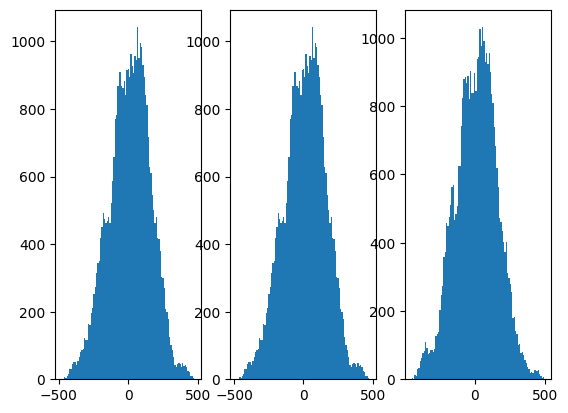

In [109]:
s_w = (W_fp.max() - W_fp.min()) / (2**bits -1)
s_x = (X_fp.max() - X_fp.min()) / (2**bits -1)
zp_w = -(W_fp.min() / s_w).round() - (2**(bits-1) -1)
zp_x = -(X_fp.min() / s_x).round() - (2**(bits-1) -1)

W = (W_fp / s_w + zp_w).round().clamp(-2**(bits-1), 2**(bits-1)-1)
X = (X_fp / s_x + zp_x).round().clamp(-2**(bits-1), 2**(bits-1)-1)
zp_w = torch.ones_like(W) * zp_w
zp_x = torch.ones_like(X) * zp_x


print(f"W min: {W.min()}, max: {W.max()}")
print(f"A min: {X.min()}, max: {X.max()}")
print(f"zp_w min: {zp_w.min()}, max: {zp_w.max()}")
print(f"zp_a min: {zp_x.min()}, max: {zp_x.max()}")

org = ((W - zp_w) @ (X - zp_x)) * s_w * s_x
print((W @ X).shape)
print((W @ zp_x).shape)
print((zp_w @ X).shape)
print((zp_w @ zp_x).shape)
longversion = (W @ X - W @ zp_x - zp_w @ X + zp_w @ zp_x) * s_w * s_x

print(torch.norm(org - longversion))

print("org min: ", org.min(), "max: ", org.max())
print("longversion min: ", longversion.min(), "max: ", longversion.max())
print(torch.norm(y_fp - org))
print(torch.norm(y_fp - longversion))

W_hat = (W-zp_w) * s_w
X_hat = (X-zp_x) * s_x
y_hat = W_hat @ X_hat
print(torch.norm(y_fp - y_hat))

print(torch.norm(y_hat - longversion))
fig, ax = plt.subplots(1, 3)
ax[0].hist(org.flatten().numpy(), bins=100)
ax[1].hist(longversion.flatten().numpy(), bins=100)
ax[2].hist(y_fp.flatten().numpy(), bins=100)
plt.show()

# Symmetric

W min: -6.0, max: 7.0
A min: 1.0, max: 7.0
zp_w min: 0.0, max: 0.0
zp_a min: 0.0, max: 0.0
torch.Size([197, 197])
torch.Size([197, 197])
torch.Size([197, 197])
torch.Size([197, 197])
tensor(0.)
org min:  tensor(-466.6177) max:  tensor(488.6433)
longversion min:  tensor(-466.6177) max:  tensor(488.6433)
tensor(5593.3452)
tensor(5593.3452)
tensor(5593.3452)
tensor(0.0050)


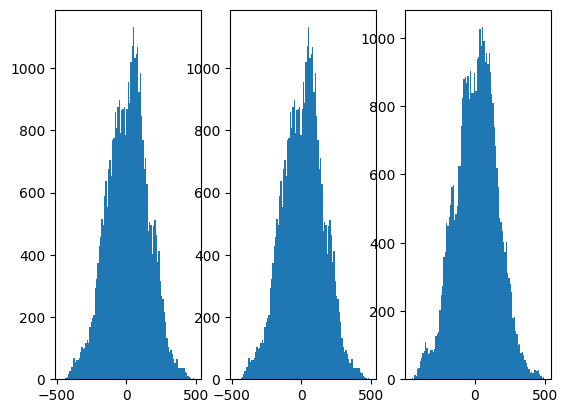

In [110]:
s_w = 2*(W_fp.max()) / (2**bits - 1)
s_x = 2*(X_fp.max()) / (2**bits - 1)
zp_w = 0 # -(W_fp.min() / s_w).round() - (2 ** (bits - 1) - 1)
zp_x = 0 # -(X_fp.min() / s_x).round() - (2 ** (bits - 1) - 1)

W = (W_fp / s_w + zp_w).round().clamp(-(2 ** (bits - 1)), 2 ** (bits - 1) - 1)
X = (X_fp / s_x + zp_x).round().clamp(-(2 ** (bits - 1)), 2 ** (bits - 1) - 1)
zp_w = torch.ones_like(W) * zp_w
zp_x = torch.ones_like(X) * zp_x


print(f"W min: {W.min()}, max: {W.max()}")
print(f"A min: {X.min()}, max: {X.max()}")
print(f"zp_w min: {zp_w.min()}, max: {zp_w.max()}")
print(f"zp_a min: {zp_x.min()}, max: {zp_x.max()}")

org = ((W - zp_w) @ (X - zp_x)) * s_w * s_x
print((W @ X).shape)
print((W @ zp_x).shape)
print((zp_w @ X).shape)
print((zp_w @ zp_x).shape)
longversion = (W @ X - W @ zp_x - zp_w @ X + zp_w @ zp_x) * s_w * s_x

print(torch.norm(org - longversion))

print("org min: ", org.min(), "max: ", org.max())
print("longversion min: ", longversion.min(), "max: ", longversion.max())
print(torch.norm(y_fp - org))
print(torch.norm(y_fp - longversion))

W_hat = (W - zp_w) * s_w
X_hat = (X - zp_x) * s_x
y_hat = W_hat @ X_hat
print(torch.norm(y_fp - y_hat))

print(torch.norm(y_hat - longversion))
fig, ax = plt.subplots(1, 3)
ax[0].hist(org.flatten().numpy(), bins=100)
ax[1].hist(longversion.flatten().numpy(), bins=100)
ax[2].hist(y_fp.flatten().numpy(), bins=100)
plt.show()